# lesson-6

### Библиотеки:

In [196]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

from sklearn.datasets import load_diabetes

import matplotlib.pyplot as plt

import random

from time import time

### Программа из методички

In [4]:
X, y = load_diabetes(return_X_y=True)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [6]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [7]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [8]:
def bias(y, z):
    return (y - z)

In [236]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [10]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [11]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [12]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1055.6105180376233
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4039.054798102543


In [13]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

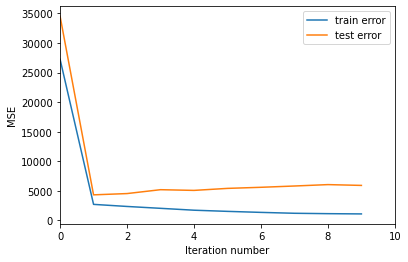

In [12]:
get_error_plot(n_trees, train_errors, test_errors)

In [13]:
n_trees = 100
coefs = [1] * n_trees

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [14]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1.5098827389294511
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тестовой выборке: 7318.145315668718


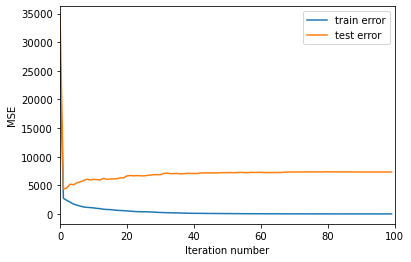

In [15]:
get_error_plot(n_trees, train_errors, test_errors)

In [16]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1.5098827389294511
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тестовой выборке: 7318.145315668718


In [17]:
eta = 0.01

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [18]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 5707.787458571243
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 8862.67154708995


In [19]:
eta = 0.1
max_depth = 5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

KeyboardInterrupt: 

In [ ]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

### Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [226]:
eta = 0.1
n_trees = 30

In [229]:
max_depth = 1

trees_1, train_errors_1, test_errors_1 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

13.678956985473633

In [204]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_1, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 6845.933055228201
Ошибка алгоритма из 30 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 6623.188907185476


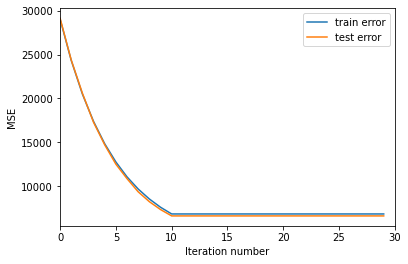

In [205]:
get_error_plot(n_trees, train_errors_1, test_errors_1)

In [231]:
max_depth = 2

trees_2, train_errors_2, test_errors_2 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

13.85129976272583

In [207]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_2, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 6191.5821578403675
Ошибка алгоритма из 30 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 6179.099880951272


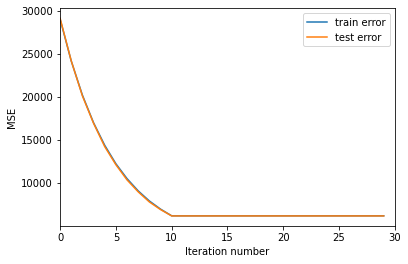

In [208]:
get_error_plot(n_trees, train_errors_2, test_errors_2)

In [232]:
max_depth = 3

trees_3, train_errors_3, test_errors_3 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

13.661537885665894

In [210]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_3, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 5773.6737075416895
Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 6077.51400439607


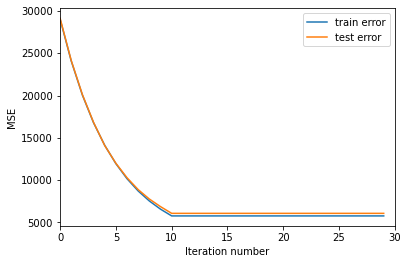

In [211]:
get_error_plot(n_trees, train_errors_3, test_errors_3)

In [237]:
max_depth = 4

t_start = time()

trees_4, train_errors_4, test_errors_4 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

t_4 = time() - t_start
t_4

13.80654239654541

In [238]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_4, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 4     с шагом 0.1 на тренировочной выборке: 5301.769524281875
Ошибка алгоритма из 30 деревьев глубиной 4     с шагом 0.1 на тестовой выборке: 6000.3140811441945


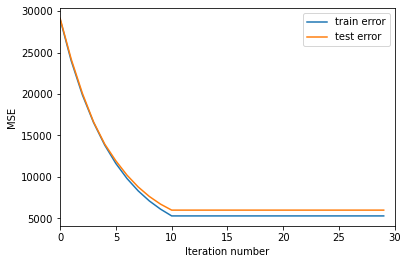

In [214]:
get_error_plot(n_trees, train_errors_4, test_errors_4)

In [215]:
max_depth = 5

trees_5, train_errors_5, test_errors_5 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

14.170923948287964

In [216]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_5, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 4789.998141183008
Ошибка алгоритма из 30 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 6091.326714107089


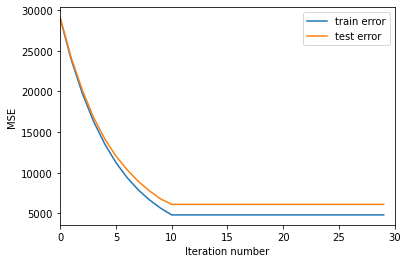

In [217]:
get_error_plot(n_trees, train_errors_5, test_errors_5)

In [218]:
max_depth = 6

trees_6, train_errors_6, test_errors_6 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

14.889941930770874

In [219]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_6, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 6     с шагом 0.1 на тренировочной выборке: 4361.7535972576
Ошибка алгоритма из 30 деревьев глубиной 6     с шагом 0.1 на тестовой выборке: 6132.3062504929685


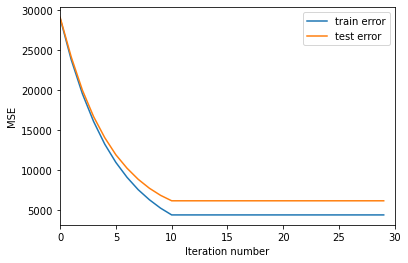

In [220]:
get_error_plot(n_trees, train_errors_6, test_errors_6)

In [221]:
max_depth = 7

trees_7, train_errors_7, test_errors_7 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

14.743680238723755

In [222]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_7, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 4044.7956616825168
Ошибка алгоритма из 30 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 6373.777693844563


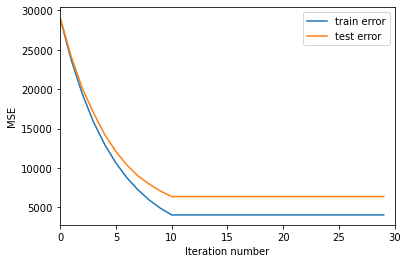

In [223]:
get_error_plot(n_trees, train_errors_7, test_errors_7)

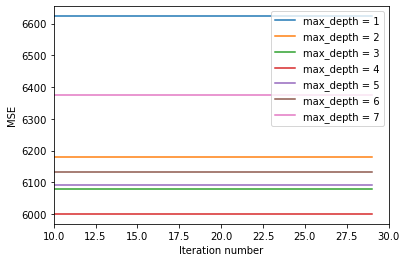

In [224]:
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(10, n_trees)
plt.plot(list(range(n_trees)[10:]), test_errors_1[10:], label='max_depth = 1')
plt.plot(list(range(n_trees)[10:]), test_errors_2[10:], label='max_depth = 2')
plt.plot(list(range(n_trees)[10:]), test_errors_3[10:], label='max_depth = 3')
plt.plot(list(range(n_trees)[10:]), test_errors_4[10:], label='max_depth = 4')
plt.plot(list(range(n_trees)[10:]), test_errors_5[10:], label='max_depth = 5')
plt.plot(list(range(n_trees)[10:]), test_errors_6[10:], label='max_depth = 6')
plt.plot(list(range(n_trees)[10:]), test_errors_7[10:], label='max_depth = 7')
plt.legend(loc='upper right')
plt.show()

#### Вывод:

Для гиперпараметров eta = 0.1, n_trees = 30: 

При max_depth = 1, max_depth = 2, max_depth = 3 - есть недообучение.

При max_depth = 5, max_depth = 6, max_depth = 7 - есть переообучение.

max_depth = 4 - оптимальное обучение.

max_depth не влияет на скорость сходимости, при любом max_depth ансамбль деревьев сходить на 10 итерации.

### Задание 2: (опция) . Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

Перепишем функцию gb_fit:

In [239]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    random.seed(42)
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            index = list(range(y_train.shape[0]))
            random.shuffle(index)
            index = index[:y_train.shape[0]//2]
            # Получим ответы на текущей композиции
            target = gb_predict([X_train[j] for j in index], trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit([X_train[j] for j in index], bias([y_train[j] for j in index], target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [240]:
max_depth = 4

t_start = time()

trees_4, train_errors_4, test_errors_4_s = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

t_4_s = time() - t_start
t_4_s

11.1931631565094

In [241]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_4, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 4     с шагом 0.1 на тренировочной выборке: 5345.519497670349
Ошибка алгоритма из 30 деревьев глубиной 4     с шагом 0.1 на тестовой выборке: 5982.180977703809


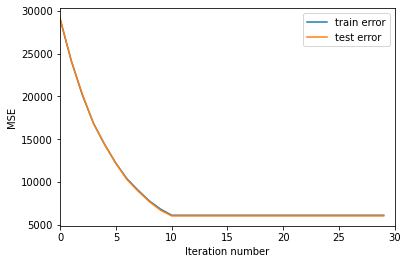

In [192]:
get_error_plot(n_trees, train_errors_4, test_errors_4)

In [ ]:
max_depth = 1

trees_4, train_errors_4, test_errors_4 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [ ]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_4, coefs, eta)

In [ ]:
get_error_plot(n_trees, train_errors_4, test_errors_4)